# Name: Durjendra Kumar

# Task 3: Exploratory Data Analysis - Retail

# GRIP@SparkFoundation - Data Science and Business Analytics - October2022

# Objective

● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can work to make more profit.

● What all business problems you can derive by exploring the data?

# Import the all required libraries.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 
from sklearn.cluster import KMeans

# Reading the data

In [2]:
dataset=pd.read_csv("C:/Users/91761/Desktop/csv1/SampleSuperstore.csv") 
print("Data Import Succesfully") 
dataset.head(5)

Data Import Succesfully


Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [3]:
dataset.shape

(9993, 13)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9993 non-null   object 
 1   Segment       9993 non-null   object 
 2   Country       9993 non-null   object 
 3   City          9993 non-null   object 
 4   State         9993 non-null   object 
 5   Postal Code   9993 non-null   int64  
 6   Region        9993 non-null   object 
 7   Category      9993 non-null   object 
 8   Sub-Category  9993 non-null   object 
 9   Sales         9993 non-null   float64
 10  Quantity      9993 non-null   int64  
 11  Discount      9993 non-null   float64
 12  Profit        9993 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.0+ KB


In [5]:
dataset.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9993.000000   9993.000000  9993.000000  9993.000000  9993.000000
mean   55186.627539    229.856670     3.789753     0.156218    28.652464
std    32063.103801    623.276273     2.225149     0.206456   234.271411
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728000
50%    56301.000000     54.480000     3.000000     0.200000     8.662000
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

# Checking missing value

In [6]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Checking the duplicates values

In [7]:
dataset.duplicated().sum()

17

# Deleting the duplicates value

In [8]:
dataset.drop_duplicates()
dataset.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5824
Quantity          14
Discount          12
Profit          7286
dtype: int64

# Deleting the Variable

In [9]:
column=['Postal Code'] 
dataset1=dataset.drop(columns=column,axis=1)

# Correlation between Variable

In [10]:
dataset1.corr()

Sales  Quantity  Discount    Profit
Sales     1.000000  0.200803 -0.028189  0.479065
Quantity  0.200803  1.000000  0.008563  0.066271
Discount -0.028189  0.008563  1.000000 -0.219480
Profit    0.479065  0.066271 -0.219480  1.000000

In [11]:
dataset1.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

  Region         Category Sub-Category     Sales  Quantity  Discount    Profit  
0  South        Furniture    Bookcases  261.9600         2      0.00   41.9136  
1  South        Furniture       Chairs  731.9400         3      0.00  219.5820  
2   West  Office Supplies       Labels   14.6200         2      0.00    6.8714  
3  South        Furniture       Tables  957.5775         5      0.45 -383.0310  
4  South  Office Supplies      Storage   22.3680         2      0.20    2.5164

# Exploratory Data Analysis

# Data Visualization

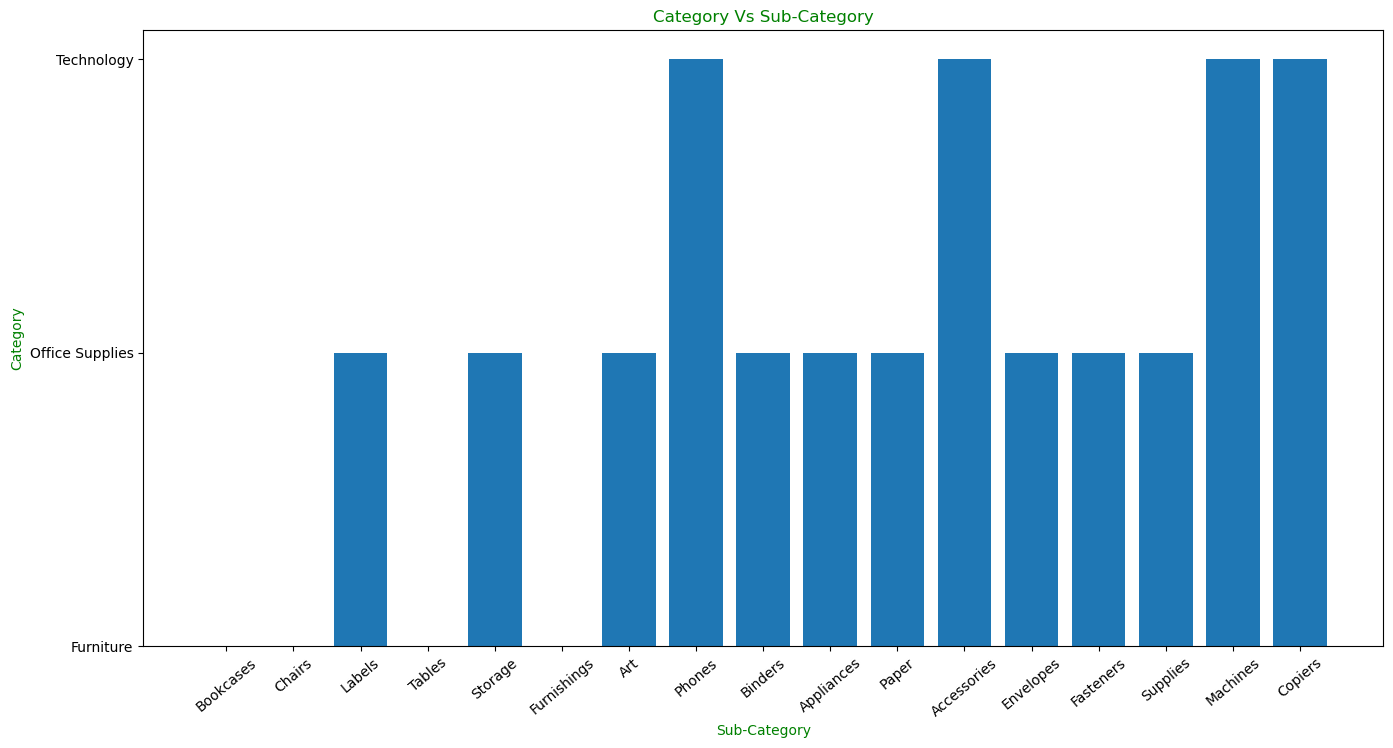

In [12]:
plt.figure(figsize=(16,8)) 
plt.bar("Sub-Category","Category",data=dataset1) 
plt.title("Category Vs Sub-Category",color="Green") 
plt.xlabel("Sub-Category",color="Green") 
plt.ylabel("Category",color="Green") 
plt.xticks(rotation=40) 
plt.show()

# Plotting Histogram

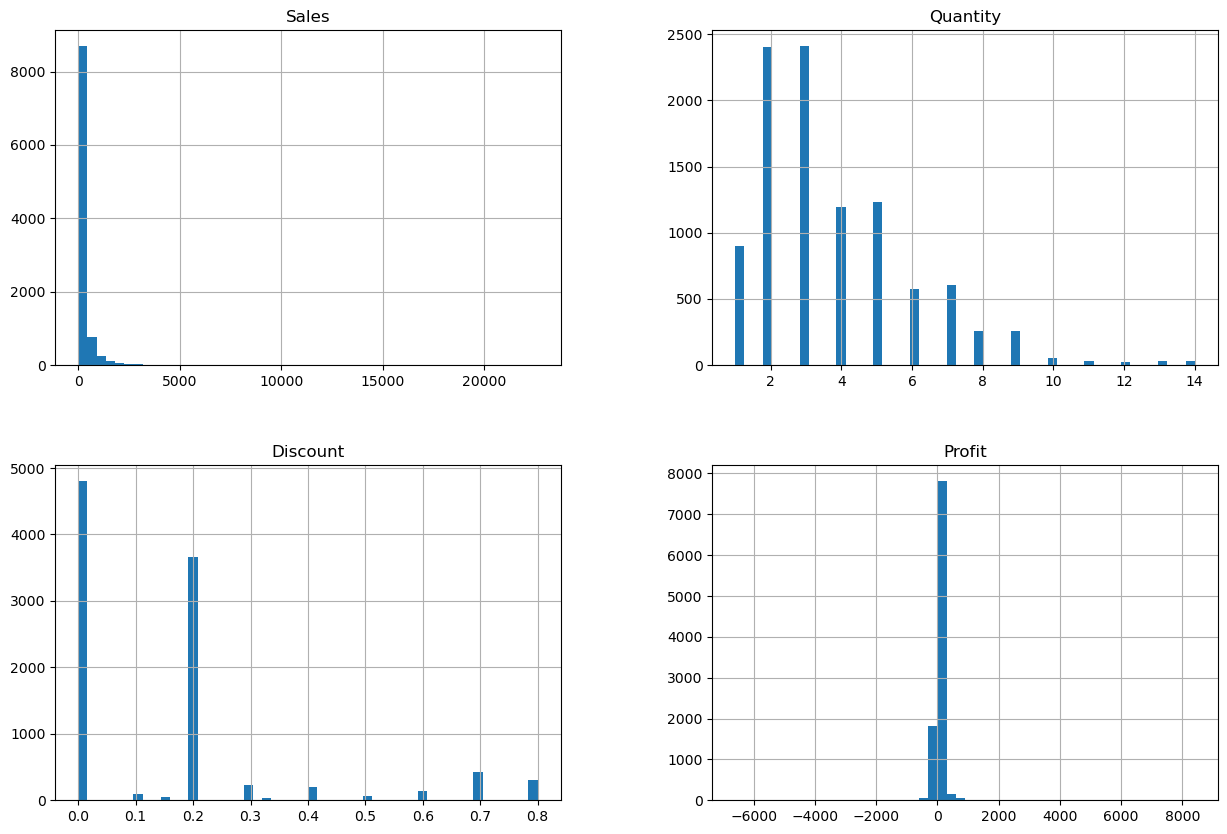

From the Seing of Histogram Graph We can say that Our Data is not Normal


In [13]:
dataset1.hist(bins=50,figsize=(15,10)) 
plt.show() 
print("From the Seing of Histogram Graph We can say that Our Data is not Normal")

# Count the total Repeatable States

In [14]:
dataset1["State"].value_counts()

California              2000
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

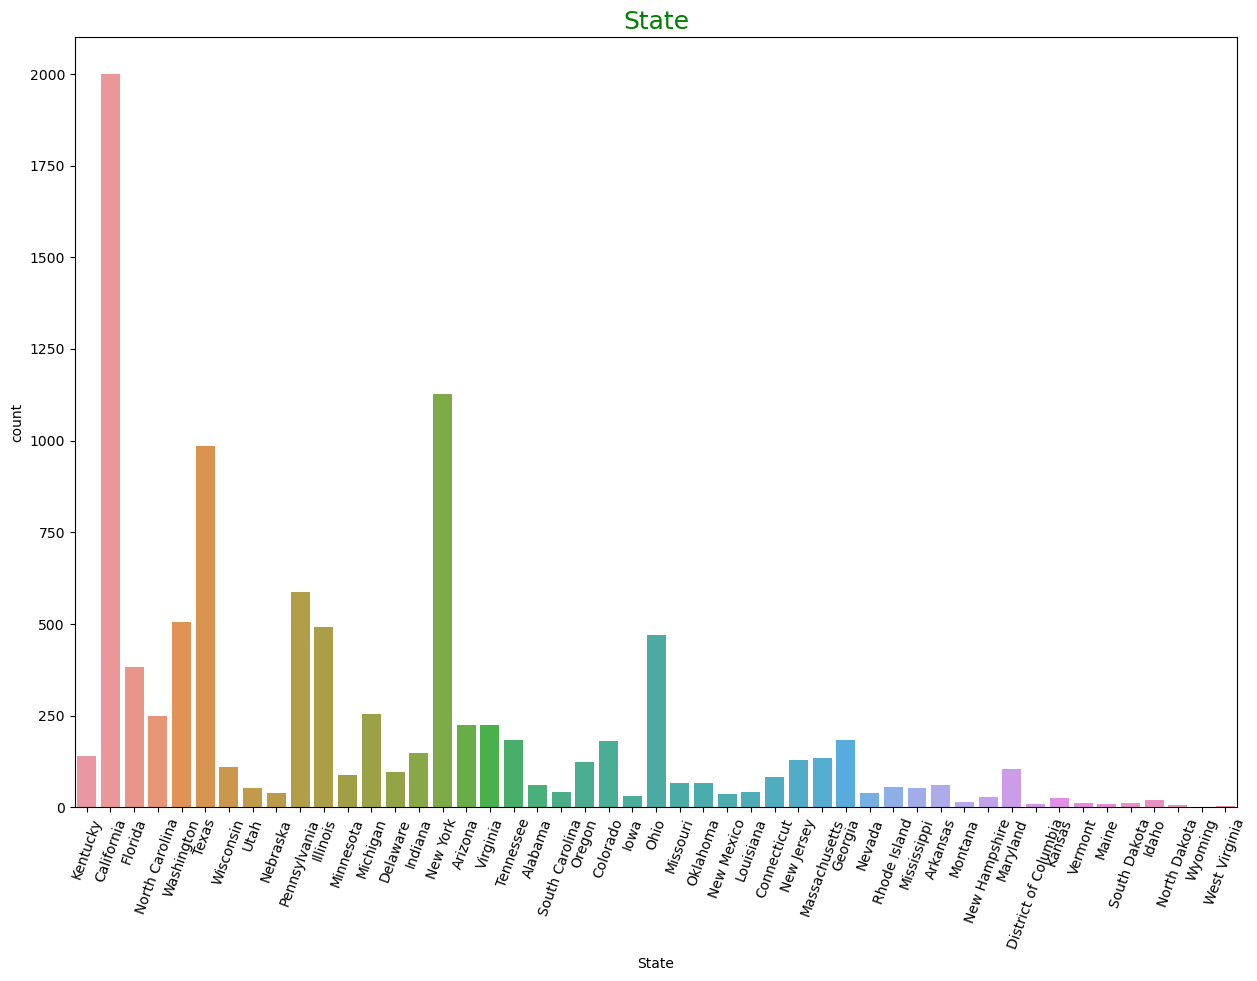

In [15]:
plt.figure(figsize=(15,10)) 
sns.countplot(x=dataset1["State"]) 
plt.xticks(rotation=70) 
plt.title("State",color="Green",fontsize=18) 
plt.show()

Next,"Copiers" Sub-category has gain highest amount of profit with no loss.There are other sub-categories too who are not faced any kind of losses but their profit margins are also low.

# Next,Suffering from highest loss is machines

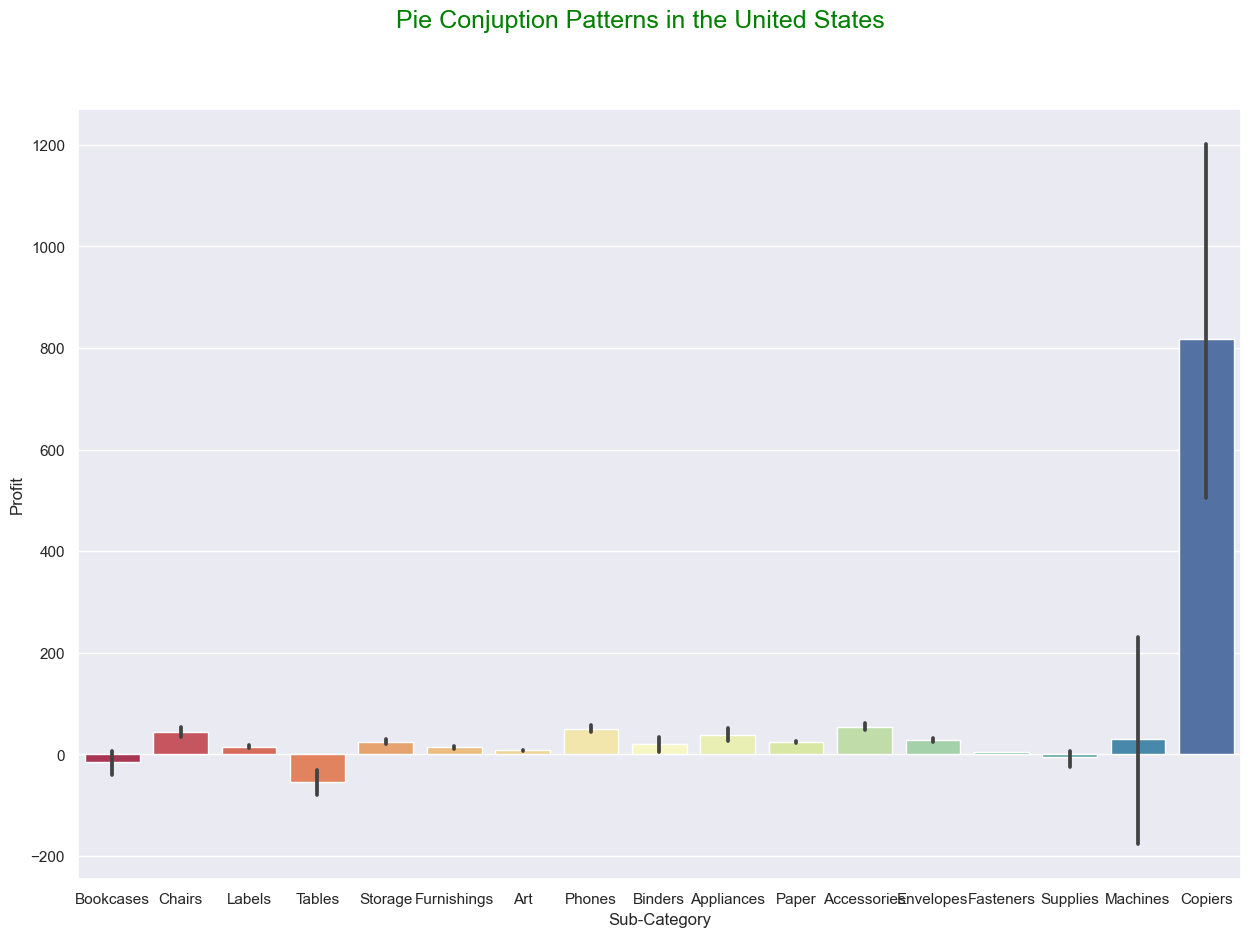

In [16]:
sns.set(style="darkgrid") 
plt.figure(2,figsize=(15,10)) 
sns.barplot(x="Sub-Category",y="Profit",data=dataset1,palette="Spectral") 
plt.suptitle("Pie Conjuption Patterns in the United States",fontsize=18,color="Green") 
plt.show()

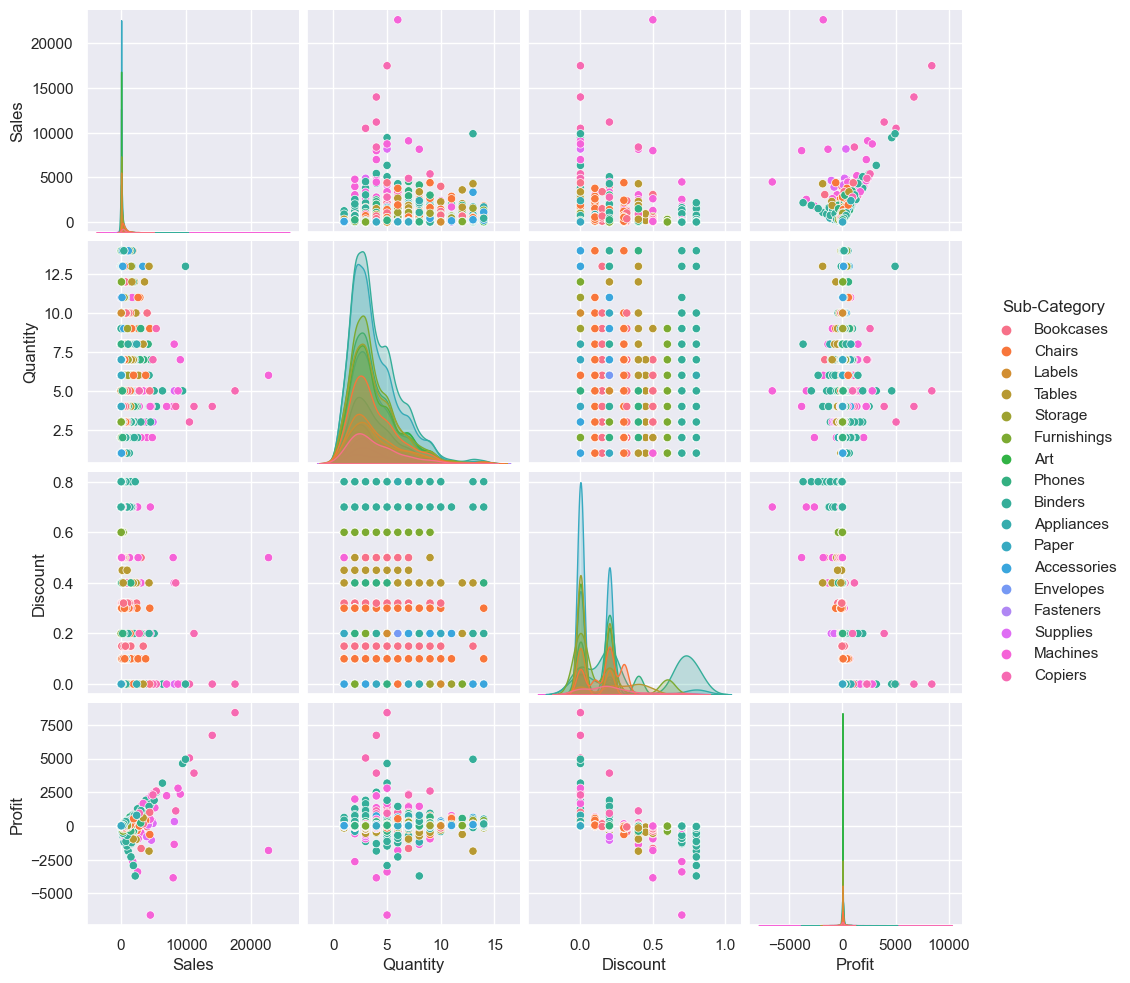

In [17]:
figsize=(15,10) 
sns.pairplot(dataset1,hue="Sub-Category") 
plt.show()

● From the above plot we can say that Our Data is not Normal and it has some amount of outliers too.

● Let's explore more about these outliers by using boxplots.

● Ist we'll check Sales from Every Segments of Whole Data.

From above Graph we can say that "Home Office" segment has less purchased Sub-Categories and in that "Tables","Supplies","Machines","Copiers","Bookcases" has the lowest Sales. "Consumer" has purchased more sub-categories as compared to other segments.

C:\Users\91761\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


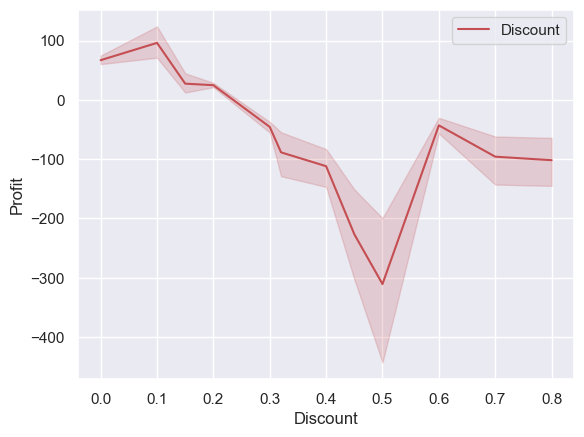

<Figure size 1000x400 with 0 Axes>

In [18]:
sns.lineplot('Discount','Profit', data=dataset1,color='r',label='Discount') 
plt.legend() 
plt.figure(figsize=(10,4)) 
plt.show()

In [19]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO', 'Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID', 'Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA', 'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi' : 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ', 'New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK', 'Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD', 'Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA', 'Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'} 
dataset1['state_code'] = dataset1.State.apply(lambda x: state_code[x])

In [20]:
state_data=dataset1[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()

In [21]:
fig=go.Figure(data=go.Choropleth( locations=state_data.index, z = state_data.Sales, locationmode = 'USA-states', colorscale = 'Reds', colorbar_title = 'Sales in USD',))

In [22]:
fig.update_layout( title_text = 'Total State-Wise Sales', geo_scope='usa', height=400,)
fig.show()

Now, let us analyze the sales of a few random states from each profit bracket (high profit, medium profit, low profit, low loss and high loss) and try to observe some crucial trends which might help us in increasing the sales.


# We have a few questions to answer here.

1 What products do the most profit making states buy?

2 What products do the loss bearing states buy?

3 What product segment needs to be improved in order to drive the profits higher?

In [23]:
def state_data_viewer(states):
    """Plots the turnover generated by different product categories and sub-categories 
                                  for the list of given states. Args: states- List of all the states 
                                  you want the plots for Returns: None """ 
    product_data = dataset1.groupby(['State']) 
    for state in states:
        data = product_data.get_group(state).groupby(['Category']) 
        fig, ax = plt.subplots(1, 3, figsize = (28,5)) 
        fig.suptitle(state, fontsize=14)
        ax_index = 0 
        for cat in ['Furniture', 'Office Supplies', 'Technology']: 
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum() 
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index]) 
            ax[ax_index].set_ylabel(cat) 
            ax_index +=1

In [24]:
fig.show()

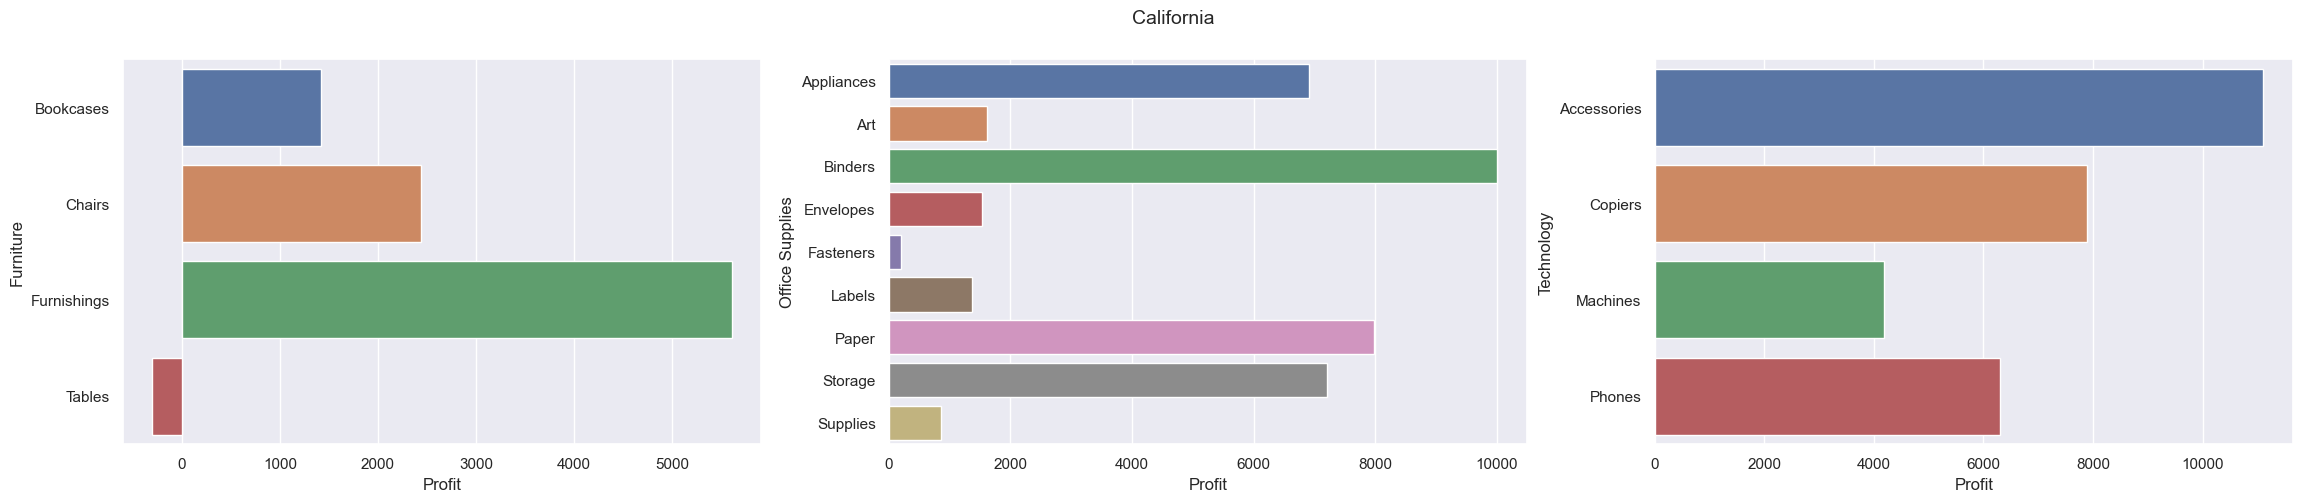

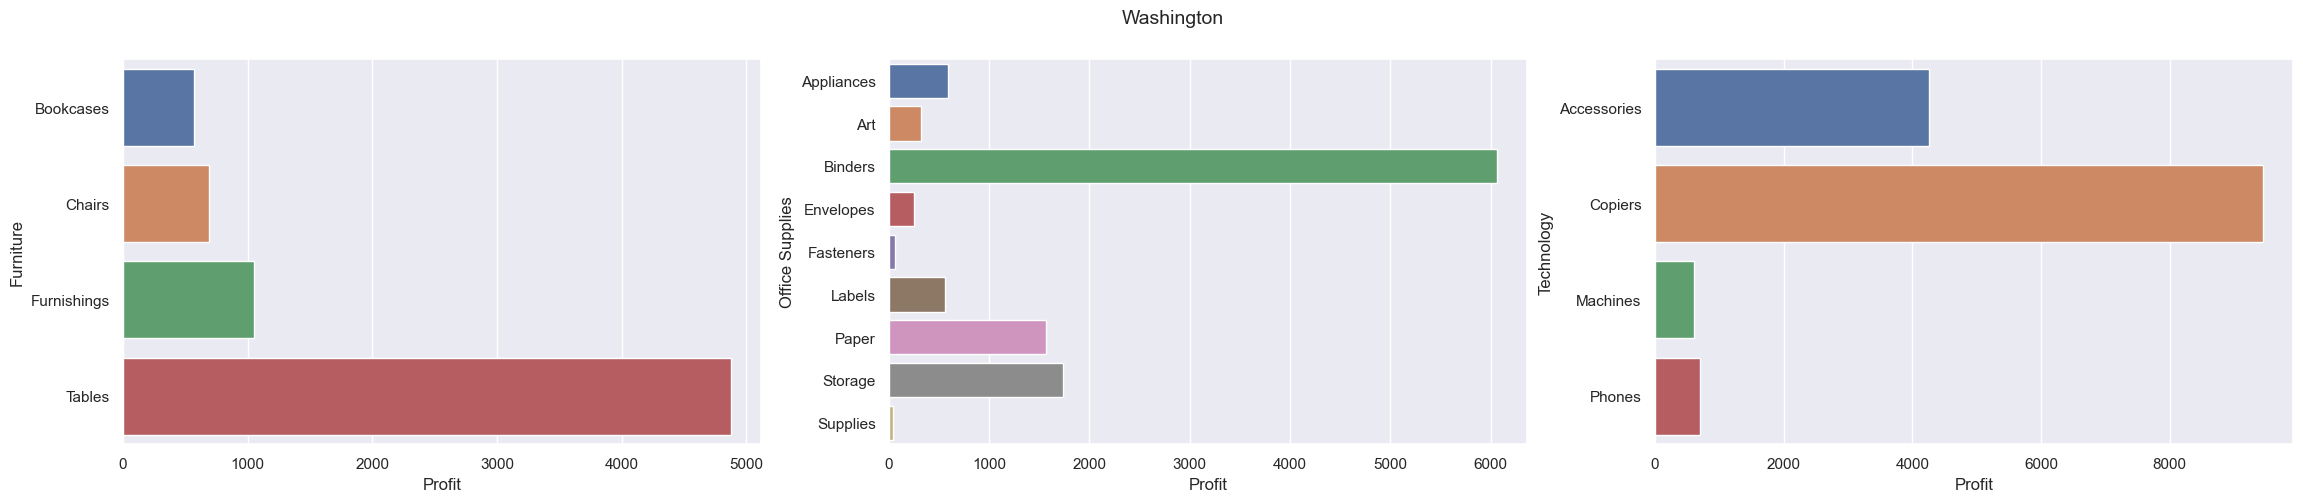

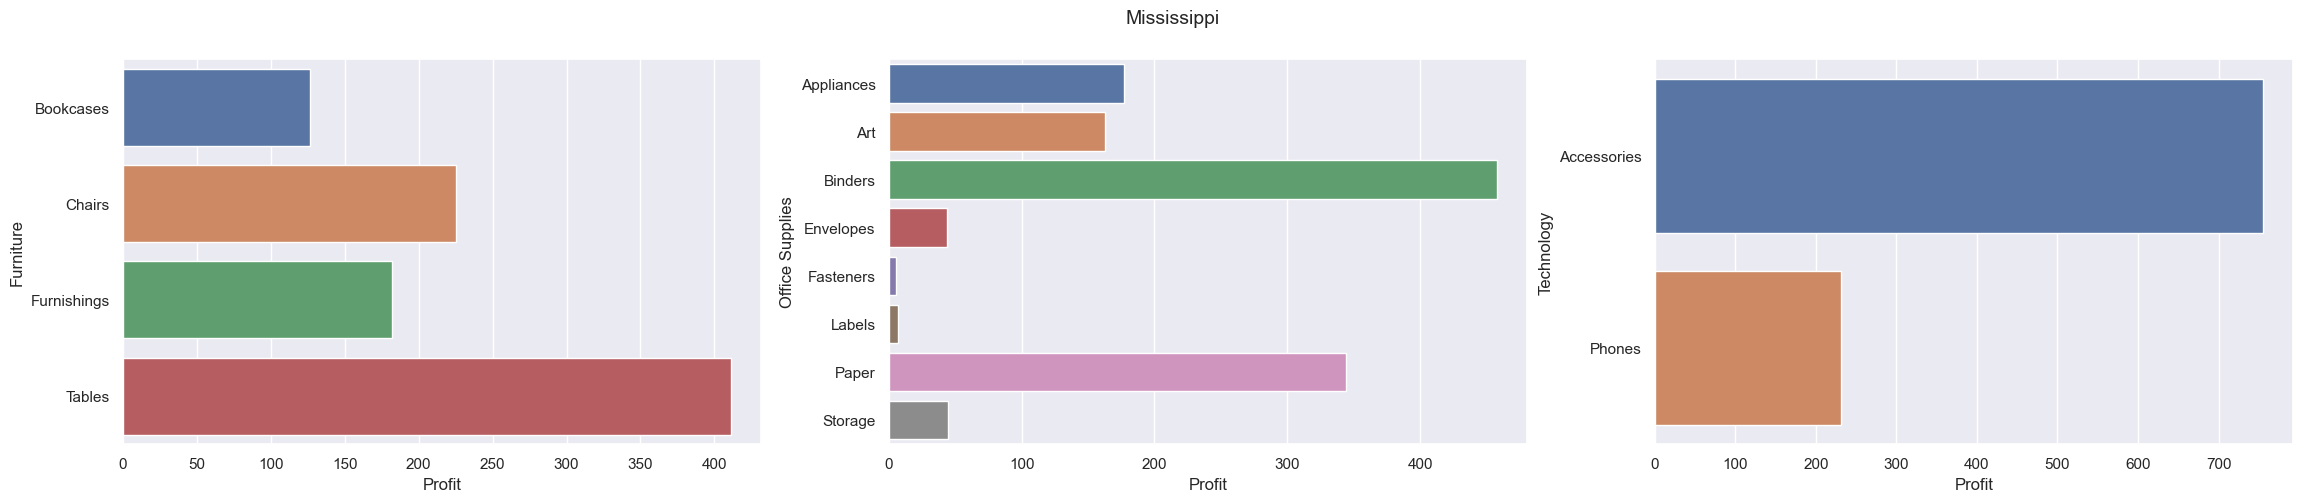

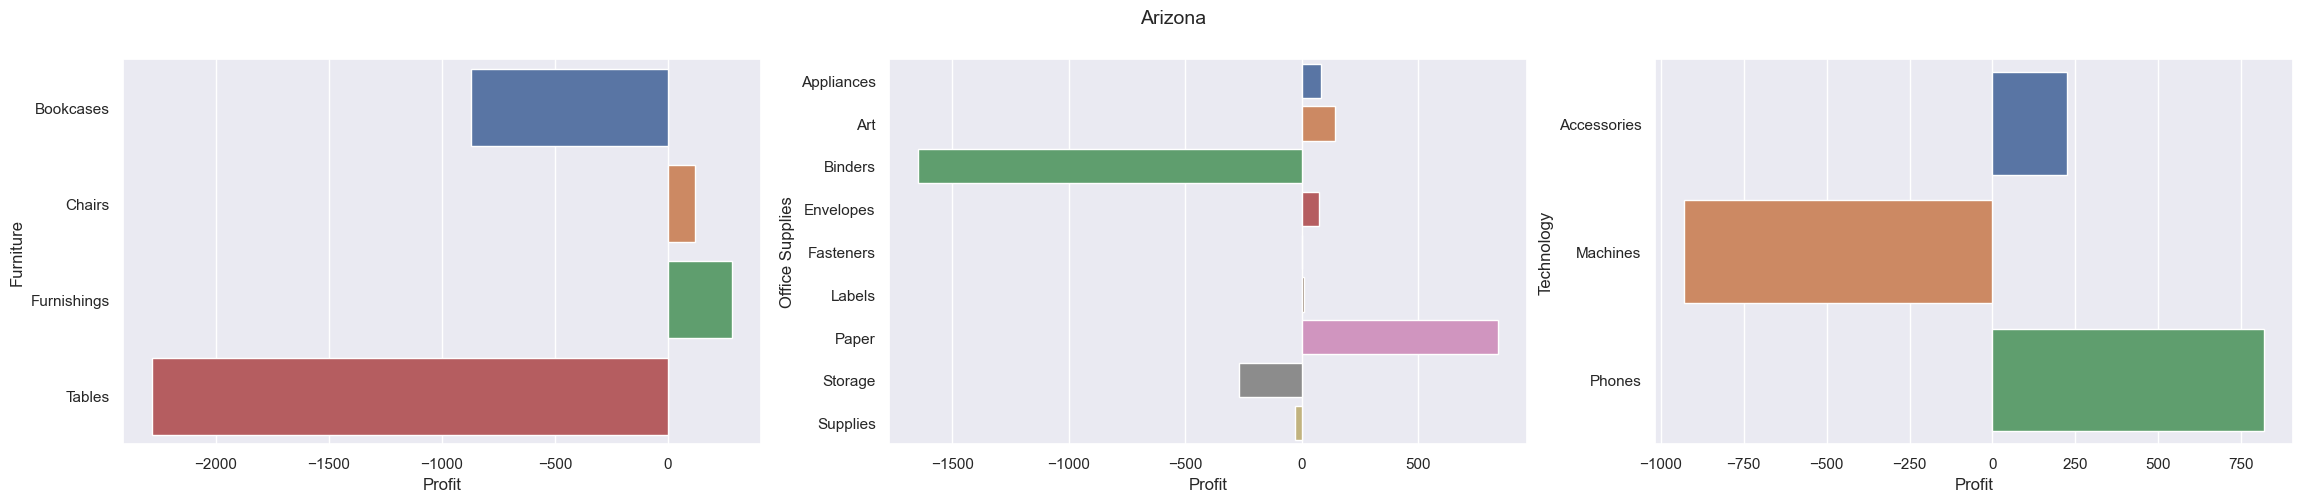

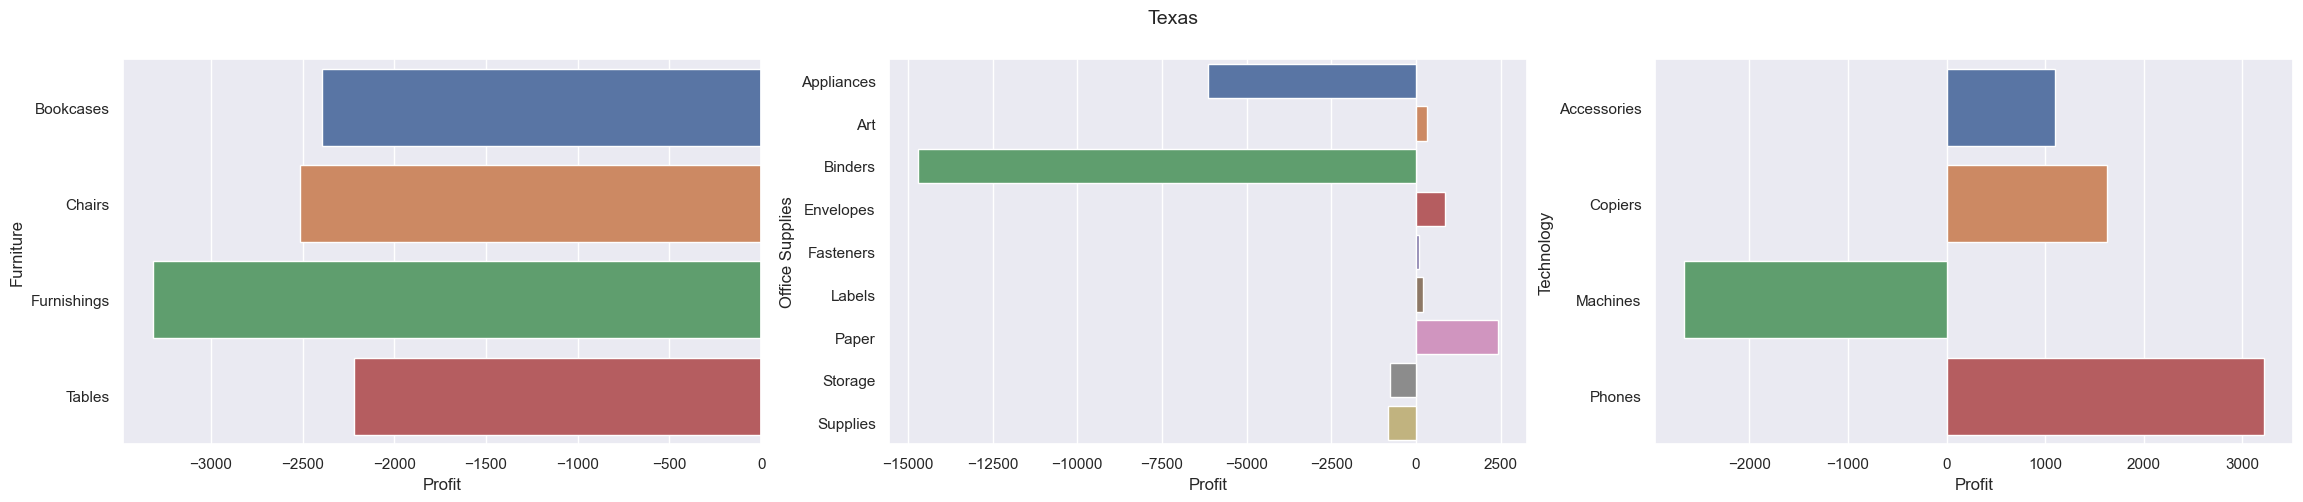

In [25]:
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas'] 
state_data_viewer(states)

# Now We Clustering Analysis(K-Means Cluatering)

In [26]:
x=dataset1.iloc[:,8:12]

In [27]:
wcss=[] 
for i in range(8, 12): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(x) 
    wcss.append(kmeans.inertia_)

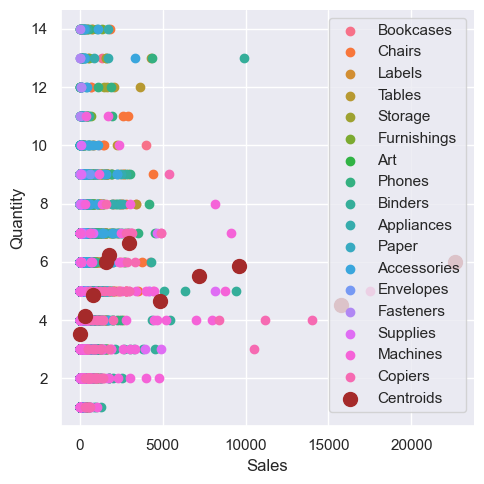

In [28]:
sns.set_style("darkgrid") 
sns.FacetGrid(dataset1, hue ="Sub-Category",height = 5).map(plt.scatter,'Sales','Quantity') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'brown', label = 'Centroids')
plt.legend() 
plt.show()

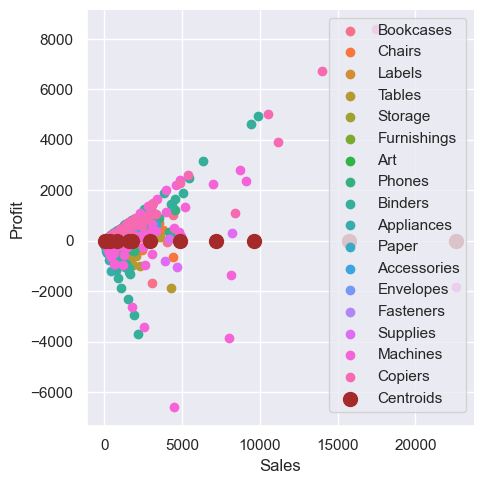

In [29]:
sns.set_style("darkgrid") 
sns.FacetGrid(dataset1, hue ="Sub-Category",height = 5).map(plt.scatter,'Sales','Profit') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'brown', label = 'Centroids')
plt.legend() 
plt.show()

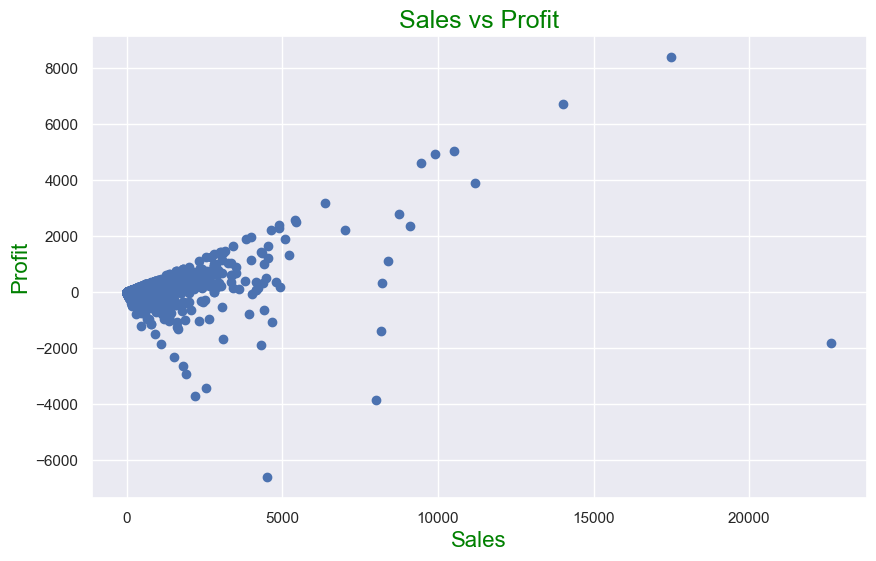

In [30]:
fig,ax=plt.subplots(figsize=(10 , 6)) 
ax.scatter(dataset1["Sales"] , dataset1["Profit"]) 
ax.set_xlabel('Sales',color='green',fontsize=16) 
ax.set_ylabel('Profit',color='green',fontsize=16) 
ax.set_title('Sales vs Profit',color='green',fontsize=18) 
plt.show()

# Finding

● Profit is more than that of sale but there are some areas where profit could be increased

● Profit and Discount is high in First Class

● Sales is high for Same day ship

● Here is top 3 city where deals are Highest

   1.New York City

   2.Los Angeles

   3.Philadelphia

● Here is top 3 city where deals are Highest

   1.New York City

   2.Los Angeles

   3.Philadelphia